In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [5]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep = ',')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH, sep = ',')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [10]:
train_df.shape[1]-1==test_df.shape[1]

True

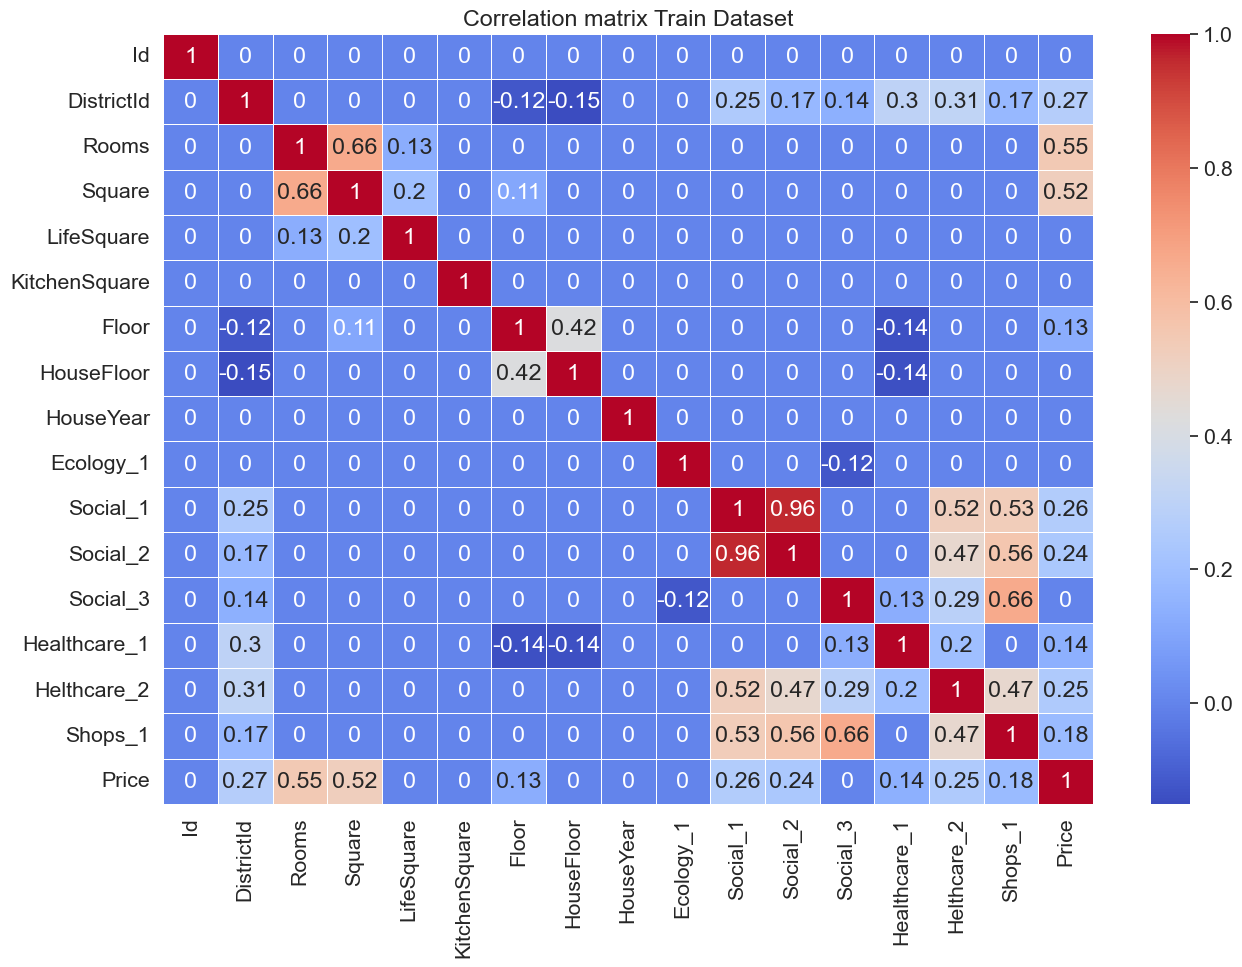

In [11]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix Train Dataset')
plt.show()

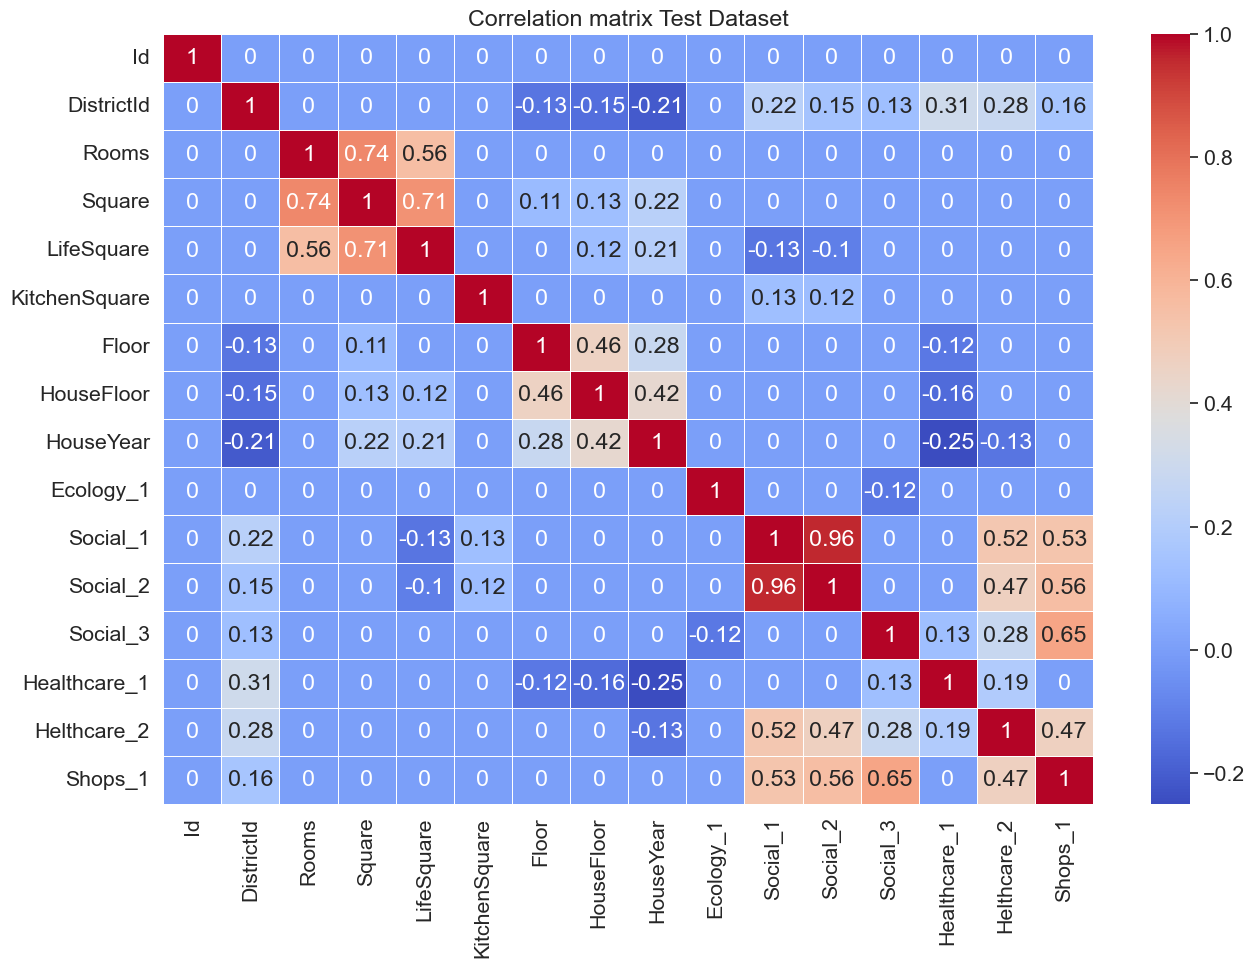

In [12]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = test_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix Test Dataset')
plt.show()

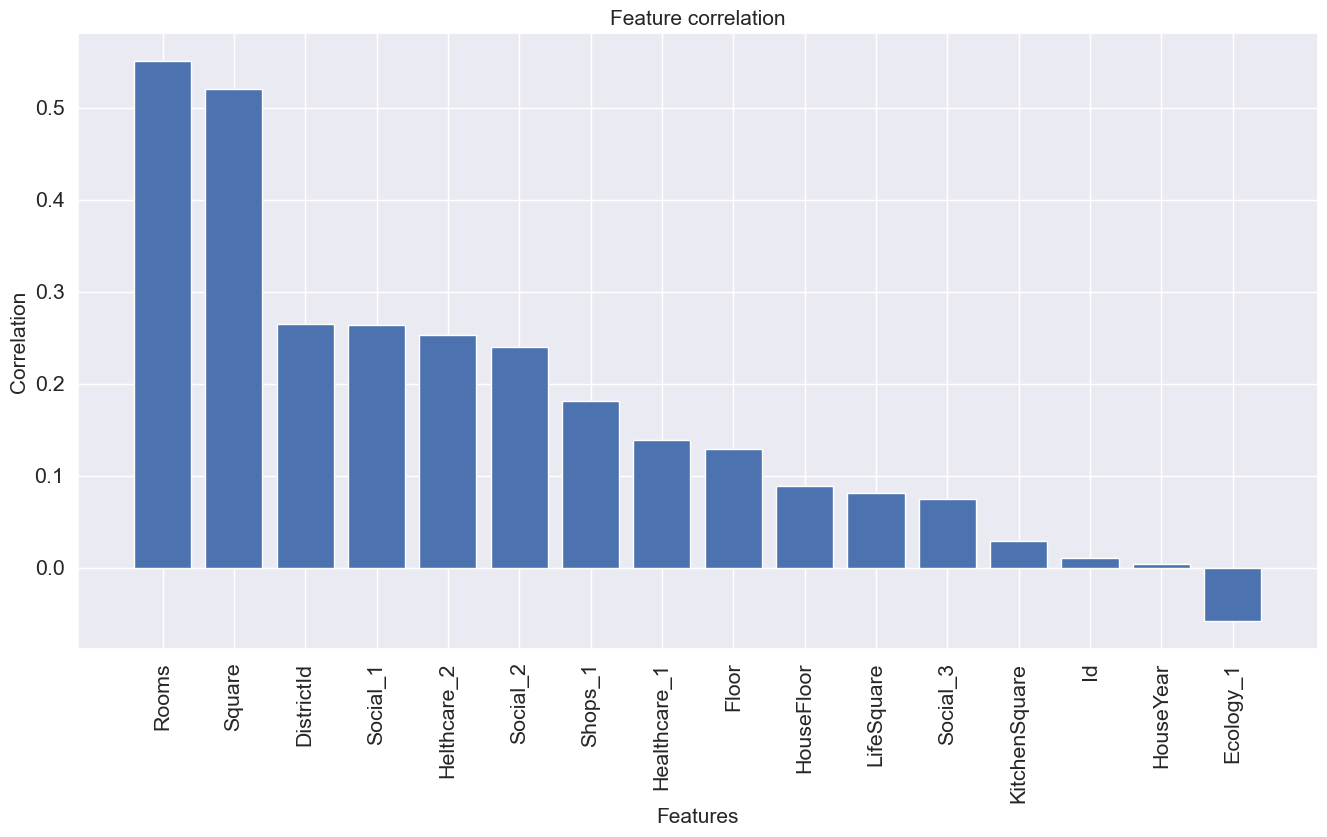

In [13]:
correlation = train_df.corrwith(train_df['Price']).sort_values(ascending=False)
correlation.drop('Price', inplace=True)

plt.figure(figsize = (16, 8))
plt.bar(correlation.index, correlation)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.title('Feature correlation', fontsize=15)
plt.show()

Бегло смотрим на выбросы

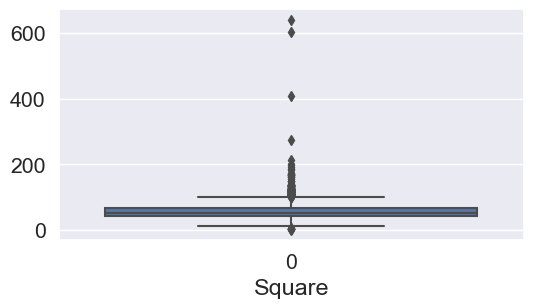

In [14]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

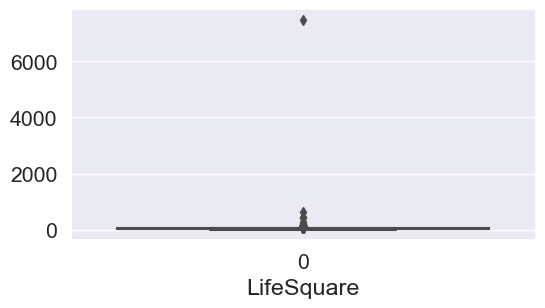

In [15]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

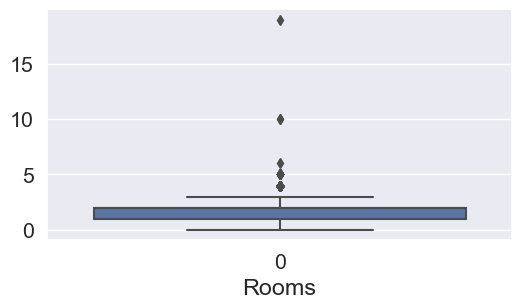

In [16]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Rooms'], whis=1.5)

plt.xlabel('Rooms')
plt.show()

In [17]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [18]:
train_df.loc[(train_df['Rooms'] ==0)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
3780,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
6401,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007
7644,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
7929,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9767,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [19]:
train_df.loc[(train_df['Id'] == 3224)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9869,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798


In [20]:
train_df = train_df.loc[train_df['Id'] != 3224] # удаляем строку
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [21]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median() # замена выбросов на медиану

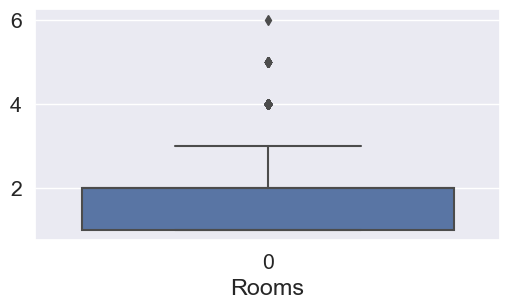

In [22]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Rooms'], whis=1.5)

plt.xlabel('Rooms')
plt.show()

In [23]:
train_df['HouseFloor'].unique(), train_df['Floor'].unique()

(array([ 10.,   8.,  17.,  22.,  16.,   9.,  12.,  20.,  14.,  24.,   5.,
          0.,   1.,   3.,   4.,   6.,   7.,  25.,  21.,  11.,   2.,  23.,
         19.,  15.,  18.,  32.,  45.,  30.,  99.,  40.,  44.,  13.,  39.,
         28.,  27.,  37., 117.,  31.,  48.,  47.,  29.,  36.,  38.,  26.]),
 array([ 4,  7,  2, 10, 16,  9,  1,  8, 12,  3,  5,  6, 11, 18, 13, 21, 22,
        15, 17, 14, 23, 19, 20, 26, 25, 27, 31, 24, 28, 32, 33, 42, 37],
       dtype=int64))

In [24]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [25]:
train_df['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

In [26]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [27]:
train_df.loc[train_df['Square']>100, 'Square']=train_df['Square'].median()
train_df.loc[train_df['Square']==0, 'Square']=train_df['Square'].median()

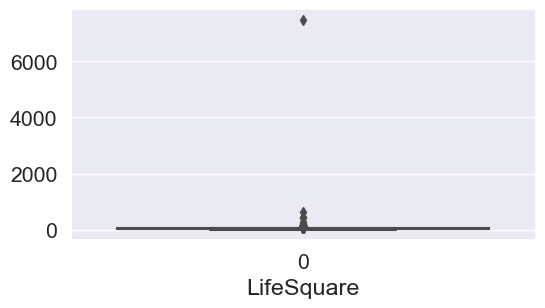

In [28]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

In [29]:
train_df['LifeSquare']/train_df['Square']  # ищем коэффициент

0            NaN
1       0.581666
2       0.608509
3            NaN
4       0.599867
          ...   
9995    0.677778
9996    0.575956
9997    0.558396
9998    0.690587
9999    0.622674
Length: 9999, dtype: float64

In [30]:
q_square_median = (train_df['LifeSquare']/train_df['Square']).median()
q_square_median

0.6200342614107478

In [31]:
train_df['LifeSquare'] = train_df['LifeSquare']. fillna(train_df['Square']*q_square_median)

In [32]:
#train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()

In [33]:
train_df.loc[train_df['LifeSquare']>7000,'LifeSquare'] = train_df.loc[train_df['LifeSquare']>7000, 'Square']*q_square_median #лечим выброс на ~ 7500

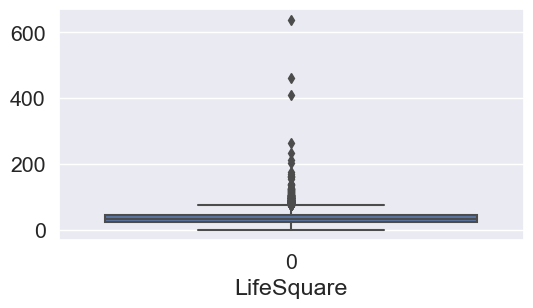

In [34]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

In [35]:
#train_df.loc[train_df['LifeSquare']>100,'LifeSquare'] = train_df.loc[train_df['LifeSquare']>100, 'Square']*q_square_median #лечим выброс выше 100

In [36]:
train_df.loc[train_df['LifeSquare']>75,'LifeSquare'] = train_df.loc[train_df['LifeSquare']>75, 'Square']*q_square_median #лечим выброс выше 75

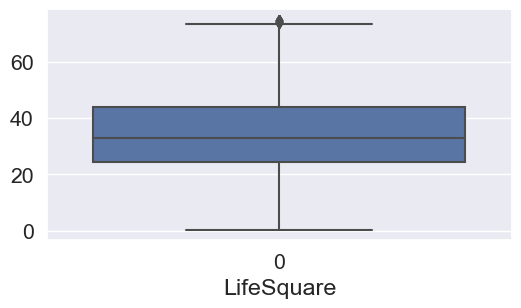

In [37]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

In [38]:
train_df.loc[(train_df['LifeSquare'] > 55) & (train_df['Square'] < 60)] # аналогично для выброса на уровне ~ 460

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
34,7757,27,2.0,58.783661,55.441256,11.0,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
123,739,84,4.0,52.513850,74.513462,9.0,4,5.0,1961,0.149666,B,B,22,4789,2,4087.0,4,1,B,415574.115819
146,11249,200,3.0,52.513850,63.516121,12.0,6,16.0,1997,0.000000,B,B,33,7425,1,NaN,2,5,B,587987.402104
283,12961,123,4.0,52.513850,70.047652,11.0,4,23.0,2005,0.000000,B,B,6,2733,0,920.0,0,4,B,445424.564229
347,340,103,4.0,52.513850,59.413974,10.0,3,14.0,2003,0.014423,B,B,19,3806,4,NaN,0,3,B,593618.746096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9641,14143,13,5.0,52.513850,69.033727,11.0,13,17.0,2001,0.090799,B,B,74,19083,2,NaN,5,15,B,434774.356335
9735,14841,23,2.0,59.854374,58.352188,1.0,2,17.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,100938.326985
9743,14754,23,3.0,52.513850,56.801439,20.0,2,2.0,2017,0.014073,B,B,2,475,0,NaN,0,0,B,231464.510346
9939,6972,45,2.0,57.788678,55.033788,1.0,4,10.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,312993.339532


In [39]:
train_df.loc[(train_df['LifeSquare'] > 55) & (train_df['Square'] < 60) ,'LifeSquare'] = train_df.loc[(train_df['LifeSquare'] > 55) & (train_df['Square'] < 60), 'Square']*q_square_median

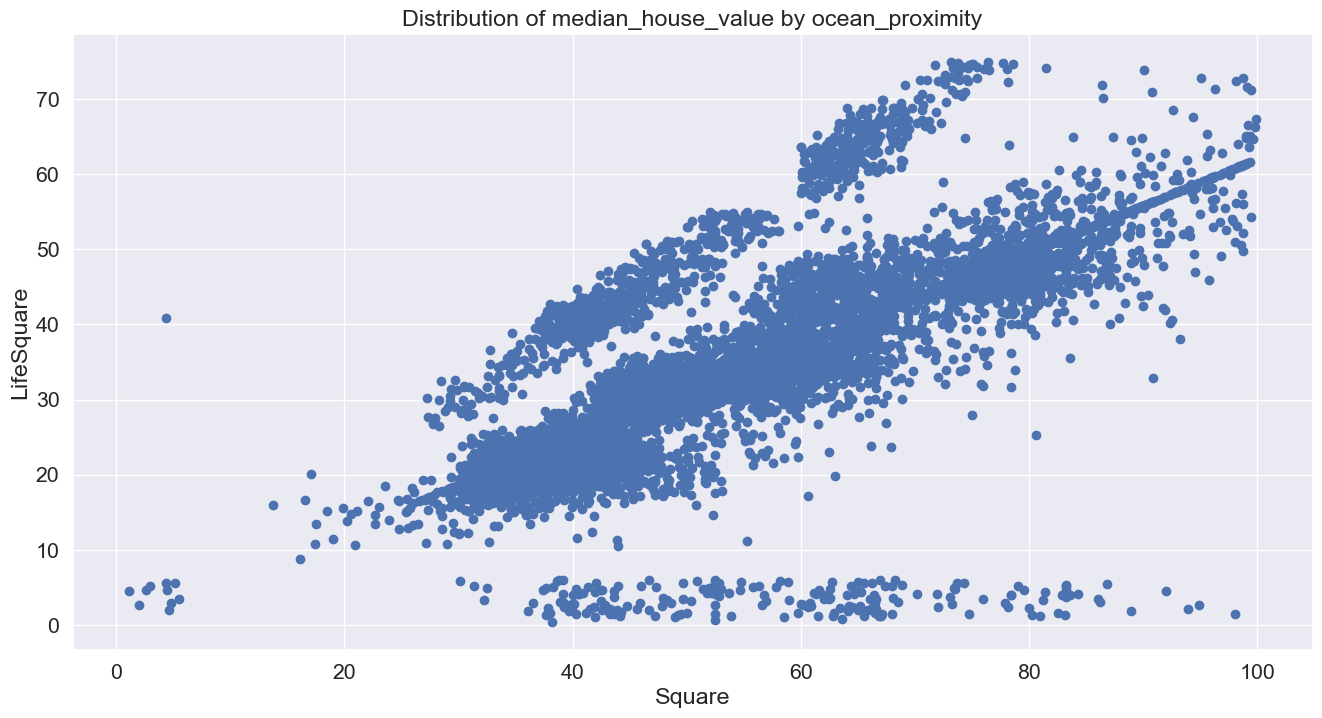

In [40]:
plt.figure(figsize=(16, 8))

plt.scatter(train_df['Square'], train_df['LifeSquare'])

plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

In [41]:
train_df.loc[(train_df['LifeSquare'] < 15) & (train_df['Square'] > 30) ,'LifeSquare'] = train_df.loc[(train_df['LifeSquare'] < 15) & (train_df['Square'] > 30), 'Square']*q_square_median

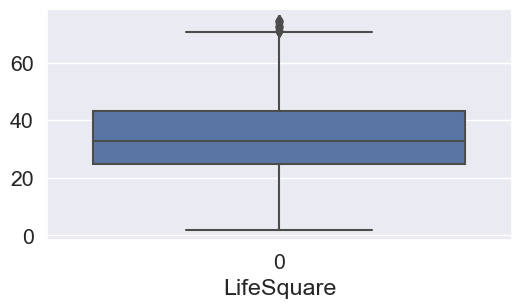

In [42]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

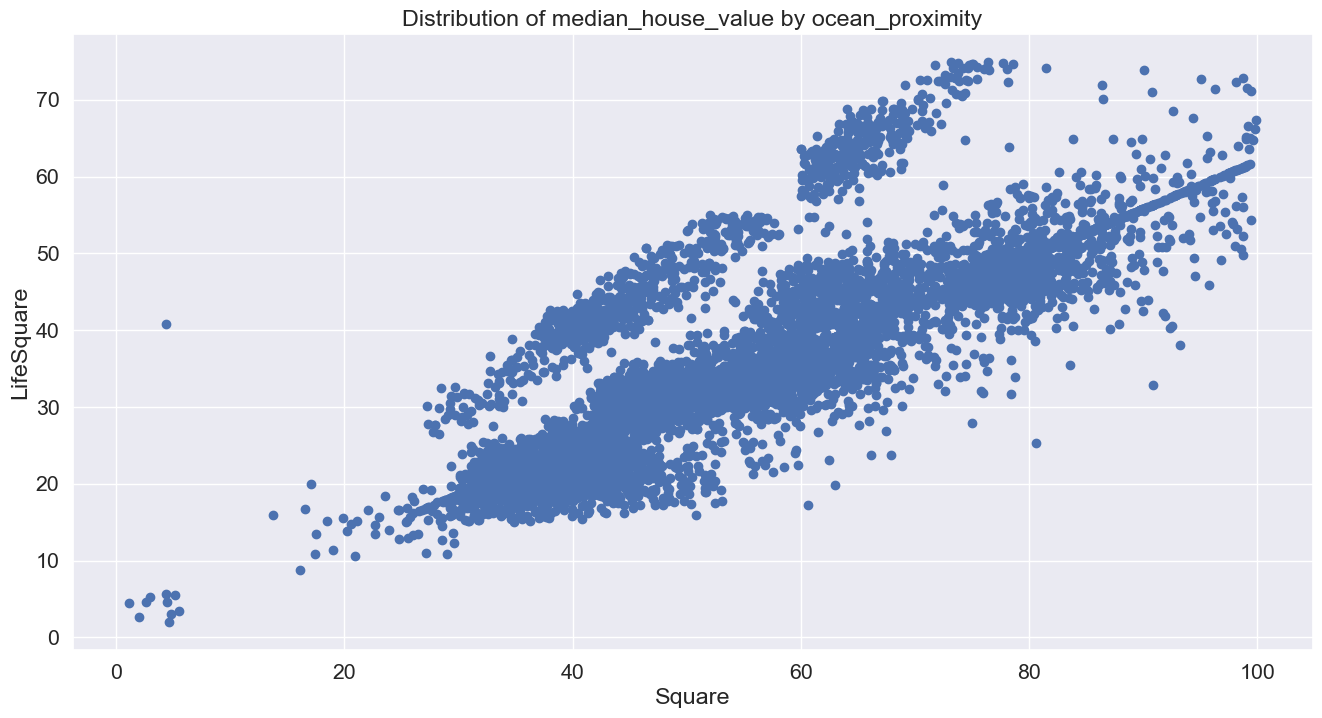

In [43]:
plt.figure(figsize=(16, 8))

plt.scatter(train_df['Square'], train_df['LifeSquare'])

plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

In [44]:
train_df.loc[(train_df['LifeSquare'] > 0) & (train_df['Square'] < 10)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
161,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323
328,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
1401,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4496,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
4800,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083
5009,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
7033,1748,88,2.0,5.497061,3.408366,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
7470,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8572,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
8805,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383


Убираем выбросы LifeSquare > 0 & Square < 10 # по идее их немного и можно дропнуть, но решил заменять на медиану

In [45]:
train_df.loc[(train_df['LifeSquare'] > 0) & (train_df['Square'] < 10), 'LifeSquare'] = train_df['LifeSquare'].median()
train_df.loc[(train_df['Square'] < 10), 'Square'] = train_df['Square'].median()
print (train_df['LifeSquare'].median(), train_df['Square'].median())

32.88858372614026 52.51385046681985


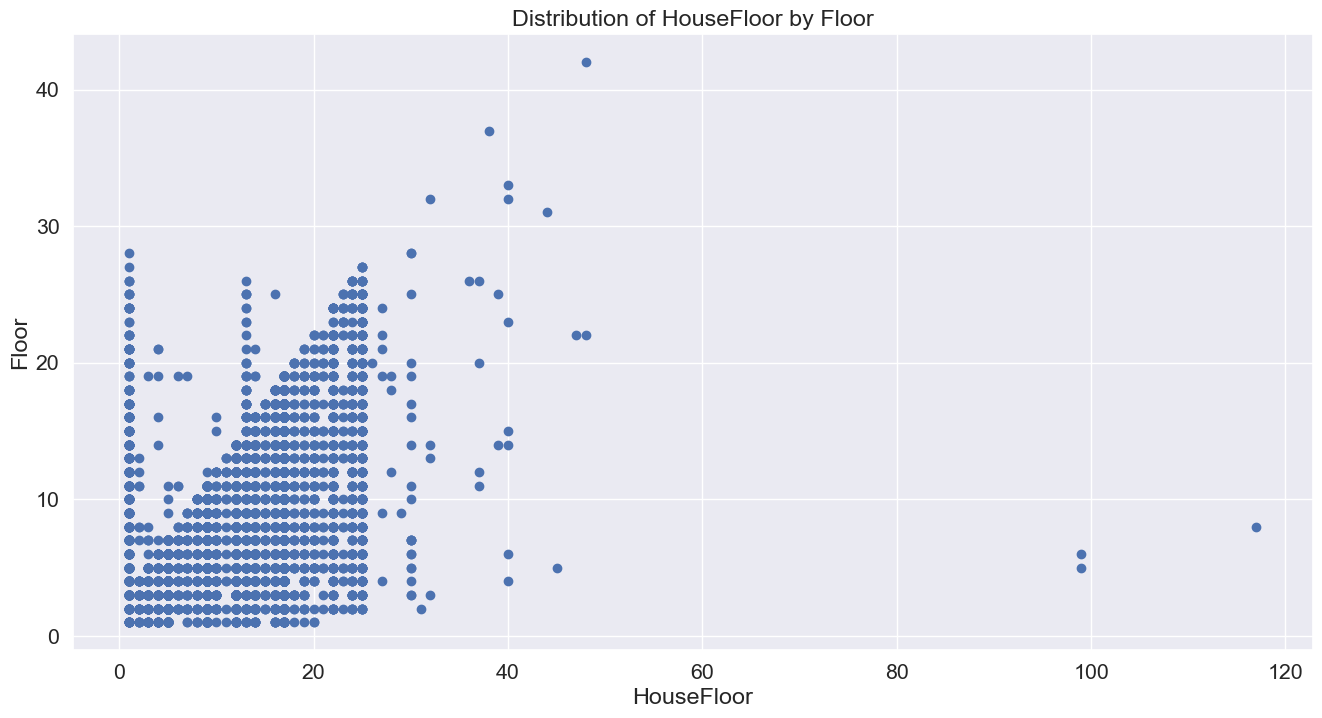

In [46]:
plt.figure(figsize=(16, 8))

plt.scatter(train_df['HouseFloor'], train_df['Floor'])

plt.xlabel('HouseFloor')
plt.ylabel('Floor')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

Убираем ошибки в Floor и HouseFloor, так как Floor не может быть больше HouseFloor

In [47]:
q_house_floor_median = (train_df['HouseFloor']/train_df['Floor']).median()
q_house_floor_median

1.5

In [48]:
train_df.loc[train_df['HouseFloor']>55,'HouseFloor'] = round(train_df.loc[train_df['HouseFloor']>55, 'Floor']*q_house_floor_median)

In [49]:
train_df.loc[(train_df['HouseFloor'] < train_df['Floor']) & (train_df['Floor'] < 25), 'HouseFloor'] = round(train_df.loc[(train_df['HouseFloor'] < train_df['Floor']) & (train_df['Floor'] < 25), 'Floor']*q_house_floor_median)

In [50]:
train_df.loc[(train_df['Floor'] >= 25), 'Floor']= train_df['Floor'].median()

In [51]:
train_df.loc[(train_df['HouseFloor'] < 5) & (train_df['Floor'] > 5), 'HouseFloor'] = round(train_df.loc[(train_df['HouseFloor'] < 5) & (train_df['Floor'] > 5), 'Floor']*q_house_floor_median)

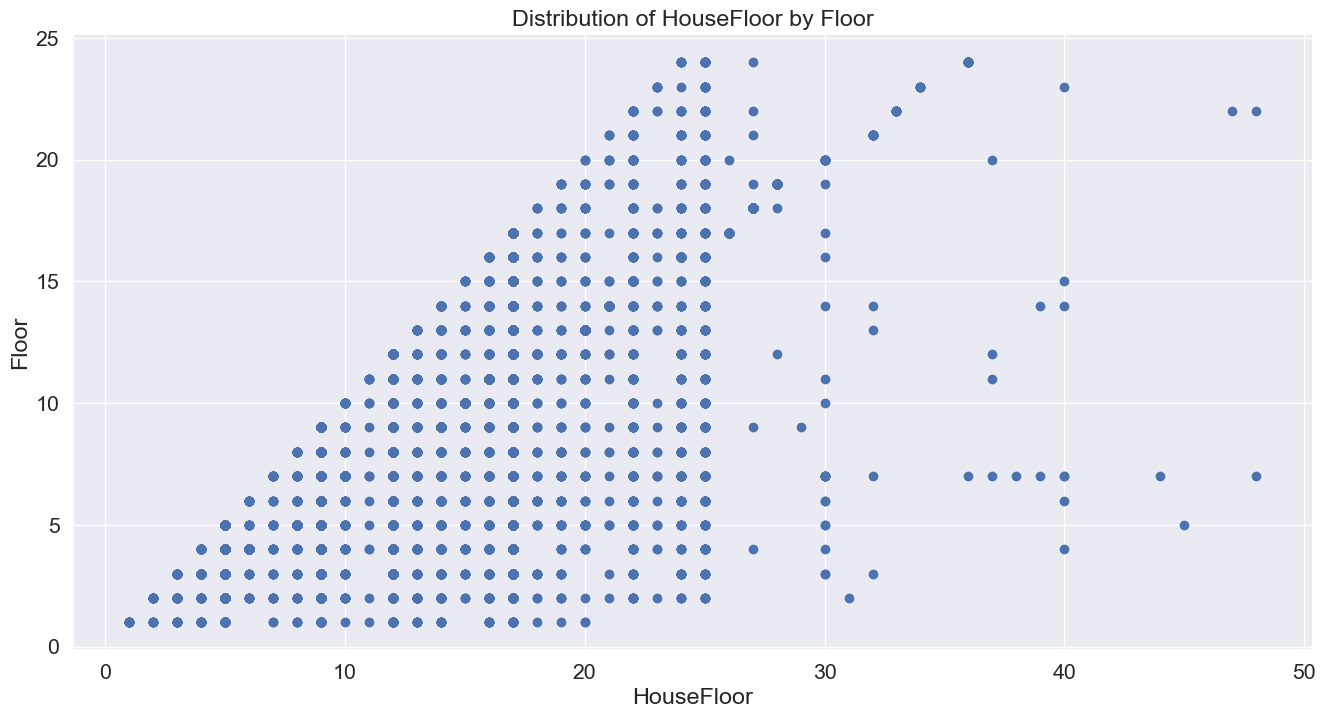

In [52]:
plt.figure(figsize=(16, 8))

plt.scatter(train_df['HouseFloor'], train_df['Floor'])

plt.xlabel('HouseFloor')
plt.ylabel('Floor')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

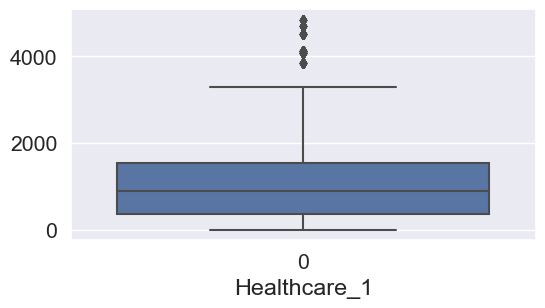

In [53]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Healthcare_1'], whis=1.5)

plt.xlabel('Healthcare_1')
plt.show()

In [54]:
train_df.loc[train_df['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3,2352,1,1.0,40.409907,25.055527,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
11,16755,88,2.0,53.975144,34.153584,8.0,2,12.0,1978,0.127376,B,B,43,8429,3,NaN,3,9,B,253124.005332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9289,1,3.0,84.486078,52.384263,0.0,4,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,264213.558631
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


In [55]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median() #заменяем на медиану

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9999 non-null   int64  
 1   DistrictId     9999 non-null   int64  
 2   Rooms          9999 non-null   float64
 3   Square         9999 non-null   float64
 4   LifeSquare     9999 non-null   float64
 5   KitchenSquare  9999 non-null   float64
 6   Floor          9999 non-null   int64  
 7   HouseFloor     9999 non-null   float64
 8   HouseYear      9999 non-null   int64  
 9   Ecology_1      9999 non-null   float64
 10  Ecology_2      9999 non-null   object 
 11  Ecology_3      9999 non-null   object 
 12  Social_1       9999 non-null   int64  
 13  Social_2       9999 non-null   int64  
 14  Social_3       9999 non-null   int64  
 15  Healthcare_1   9999 non-null   float64
 16  Helthcare_2    9999 non-null   int64  
 17  Shops_1        9999 non-null   int64  
 18  Shops_2 

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9999 non-null   int64  
 1   DistrictId     9999 non-null   int64  
 2   Rooms          9999 non-null   float64
 3   Square         9999 non-null   float64
 4   LifeSquare     9999 non-null   float64
 5   KitchenSquare  9999 non-null   float64
 6   Floor          9999 non-null   int64  
 7   HouseFloor     9999 non-null   float64
 8   HouseYear      9999 non-null   int64  
 9   Ecology_1      9999 non-null   float64
 10  Ecology_2      9999 non-null   object 
 11  Ecology_3      9999 non-null   object 
 12  Social_1       9999 non-null   int64  
 13  Social_2       9999 non-null   int64  
 14  Social_3       9999 non-null   int64  
 15  Healthcare_1   9999 non-null   float64
 16  Helthcare_2    9999 non-null   int64  
 17  Shops_1        9999 non-null   int64  
 18  Shops_2 

In [58]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A': 0, 'B': 1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A': 0, 'B': 1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A': 0, 'B': 1})

In [59]:
train_df = train_df[train_df['Square'].isnull() | 
                    (train_df['Square'] < train_df['Square'].quantile(.975)) |
                    (train_df['Square'] > train_df['Square'].quantile(.025))]
train_df = train_df[train_df['LifeSquare'].isnull() | 
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) |
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]
train_df = train_df[train_df['KitchenSquare'].isnull() | 
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [60]:
train_df.shape

(9743, 23)

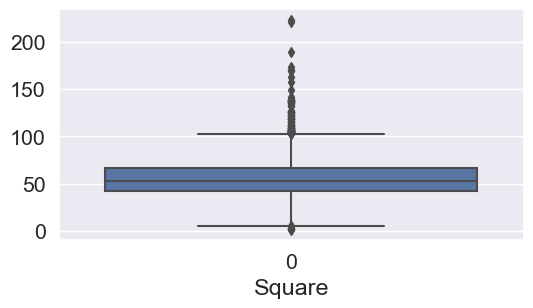

In [61]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

In [62]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
.rename(columns={'index':'DistrictId', 'DistrictId': 'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,809
1,1,646
2,23,546
3,6,503
4,9,292


In [63]:
train_df = train_df.merge(district_size, on = 'DistrictId', how = 'left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,...,0,900.0,0,0,B,305018.871089,1,1,1,809
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,1183.0,1,0,B,177734.553407,1,1,1,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,240.0,3,1,B,282078.720850,1,1,1,646
3,2352,1,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,...,0,900.0,0,1,B,168106.007630,1,1,1,646
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2,900.0,0,6,B,343995.102962,1,1,1,88


In [64]:
(train_df['DistrictSize'] > 100).value_counts()

True     4942
False    4801
Name: DistrictSize, dtype: int64

In [65]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

In [66]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,...,900.0,0,0,B,305018.871089,1,1,1,809,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,B,177734.553407,1,1,1,78,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.0,3,1,B,282078.720850,1,1,1,646,1
3,2352,1,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,...,900.0,0,1,B,168106.007630,1,1,1,646,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,900.0,0,6,B,343995.102962,1,1,1,88,0


In [67]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district.head(10)

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142486.170594
1,0,2.0,176210.812334
2,0,3.0,308098.189977
3,1,1.0,147110.201250
4,1,2.0,202626.530012
5,1,3.0,243966.403596
6,1,4.0,277290.705058
7,2,1.0,174545.972737
8,2,2.0,214219.389073
9,2,3.0,323304.615000


In [68]:
train_df = train_df.merge(med_price_by_district, on = ['DistrictId', 'Rooms'], how = 'left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,1,1,1,809,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,B,177734.553407,1,1,1,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,B,282078.720850,1,1,1,646,1,243966.403596
3,2352,1,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,1,1,1,646,1,147110.201250
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,1,1,1,88,0,201584.441255


In [69]:
med_price_by_square = train_df.groupby(['Square'], as_index=False).agg({'Price': 'median'})\
                        .rename(columns={'Price':'MedPriceBySquare'})
med_price_by_square.head()

,Square,MedPriceBySquare
0,13.784865,78388.806186
1,16.117154,79913.267856
2,16.547242,77835.185808
3,17.046188,74222.110465
4,17.414181,180750.471749


In [70]:
#train_df = train_df.merge(med_price_by_square, on = ['Square'], how = 'left')
#train_df.head()

In [71]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [72]:
#test_df = test_df.merge(med_price_by_square, on = 'Square', how = 'left')
#test_df.head()

In [73]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [74]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3', 
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']
Id = ['Id']
new_features_names = ['IsDistrictLarge', 'MedPriceByDistrict']
target_name = 'Price'

In [75]:
X = train_df[feature_names + new_features_names]
y = train_df[target_name]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle = True, random_state = 21)

In [77]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred = model.predict(X_test)

y_pred.shape

(3216,)

In [79]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
4527,132336.841815,131178.839667
7712,107265.036506,128678.631211
2691,220804.817110,229333.467539
2979,199321.457917,180391.804601
7340,251197.620556,307106.164013
2533,117801.204933,106099.867027
1286,266621.110418,228800.048450
5344,158122.321392,175774.848425
2531,220556.031567,187345.256334
7288,162549.775280,183690.389512


In [80]:
r2_score_model = r2(check_test['y_pred'], check_test['y_test'])
print(r2_score_model)

0.671112005214966


Train R2:	0.965
Test R2:	0.742


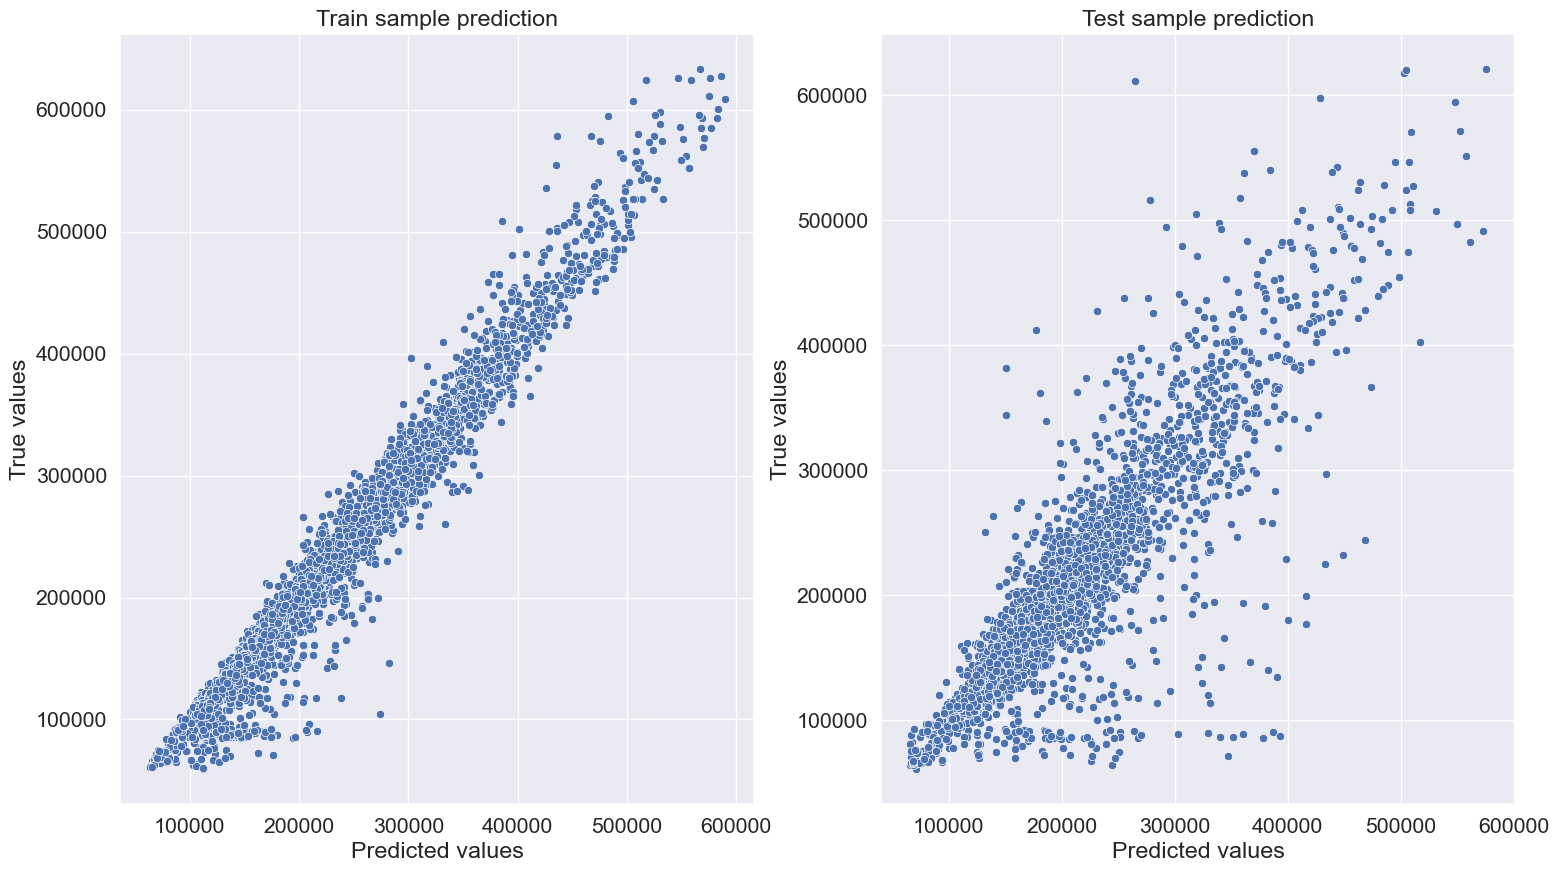

In [81]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [82]:
cv_score = cross_val_score(model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.74453144, 0.74621653, 0.75097795])

In [83]:
cv_score.mean()

0.7472419717186357

In [84]:
feature_importances = pd.DataFrame(zip(X_train.columns, model.feature_importances_), columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceByDistrict,0.651075
1,Square,0.089637
6,HouseYear,0.033576
2,LifeSquare,0.031525
5,HouseFloor,0.030685
12,Social_3,0.025332
4,Floor,0.025051
3,KitchenSquare,0.023268
11,Social_2,0.017673
7,Ecology_1,0.017629


In [85]:
test_df.info() # смотрим пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

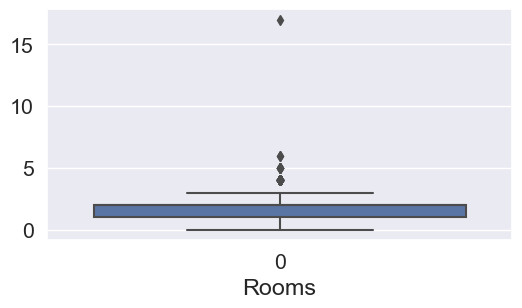

In [86]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['Rooms'], whis=1.5)

plt.xlabel('Rooms')
plt.show()

In [87]:
test_df['Rooms'].value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [88]:
test_df.loc[(test_df['Rooms'] ==0)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
961,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
4179,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [89]:
test_df.loc[test_df['Rooms']==0, 'Rooms']=test_df['Rooms'].median()

In [90]:
test_df.loc[test_df['Rooms']==17, 'Rooms']=test_df['Rooms'].median()

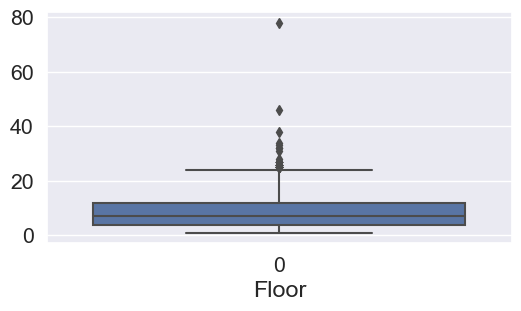

In [91]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['Floor'], whis=1.5)

plt.xlabel('Floor')
plt.show()

In [92]:
test_df.loc[(test_df['Floor'] > 30)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
653,13970,8,1.0,49.806976,45.910825,1.0,32,32.0,2009,0.092291,B,B,21,4346,2,165.0,1,2,B
1483,15759,17,2.0,57.601870,37.744743,10.0,78,22.0,1989,0.000000,B,B,25,5027,4,46.0,1,1,B
1690,2461,72,2.0,103.114357,4.312838,1.0,34,37.0,2015,0.210473,B,B,11,2398,2,1994.0,3,0,B
2072,5707,76,2.0,73.363523,38.740060,5.0,38,48.0,2010,0.000000,B,B,7,1660,39,1786.0,1,5,B
2306,414,76,2.0,67.609808,41.175948,5.0,46,48.0,2002,0.000000,B,B,7,1660,39,1786.0,1,5,B
3406,16166,31,2.0,88.186012,54.253582,16.0,31,40.0,2012,0.151346,B,A,32,5889,10,830.0,4,1,B
3960,4533,31,2.0,83.963299,38.419224,14.0,33,40.0,2014,0.151346,B,A,32,5889,10,830.0,4,1,B
4402,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B


In [93]:
test_df['HouseFloor'].unique(), test_df['Floor'].unique()

(array([ 9., 17., 19.,  2., 23., 16.,  1., 24., 22., 12.,  5., 25., 14.,
         3.,  0.,  4., 18., 15.,  8., 10.,  7., 21.,  6., 13., 20., 99.,
        32., 11., 26., 30., 40., 28., 37., 48., 27., 39., 31., 33., 34.,
        29., 36.]),
 array([ 5,  7, 19,  2,  8,  4, 10,  1, 25, 14,  6, 13, 11, 24, 18, 21, 12,
         9, 17, 22,  3, 15, 23, 16, 20, 32, 27, 26, 78, 34, 38, 46, 31, 28,
        33], dtype=int64))

In [94]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [95]:
test_q_house_floor_median = (test_df['HouseFloor']/test_df['Floor']).median()
test_q_house_floor_median

1.4285714285714286

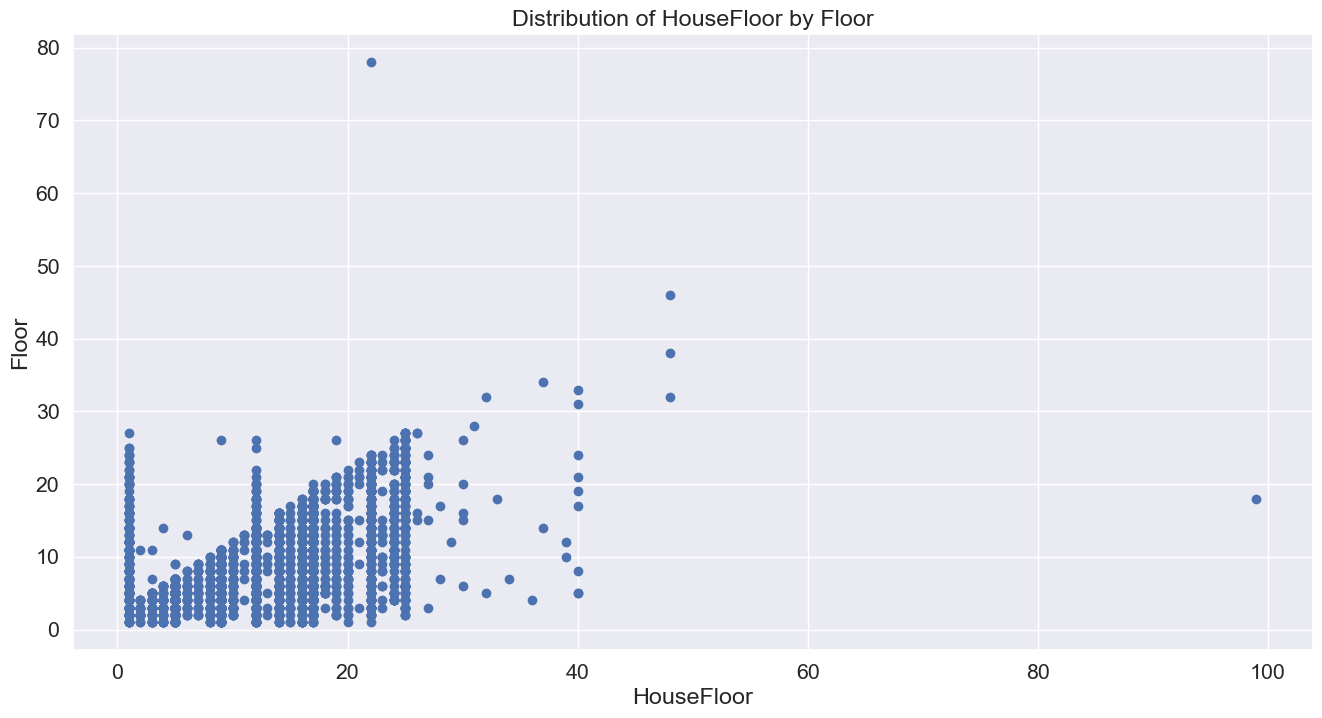

In [96]:
plt.figure(figsize=(16, 8))

plt.scatter(test_df['HouseFloor'], test_df['Floor'])

plt.xlabel('HouseFloor')
plt.ylabel('Floor')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

In [97]:
test_df.loc[(test_df['HouseFloor'] < test_df['Floor']), 'HouseFloor'] = round(test_df.loc[(test_df['HouseFloor'] < test_df['Floor']), 'Floor']*test_q_house_floor_median)

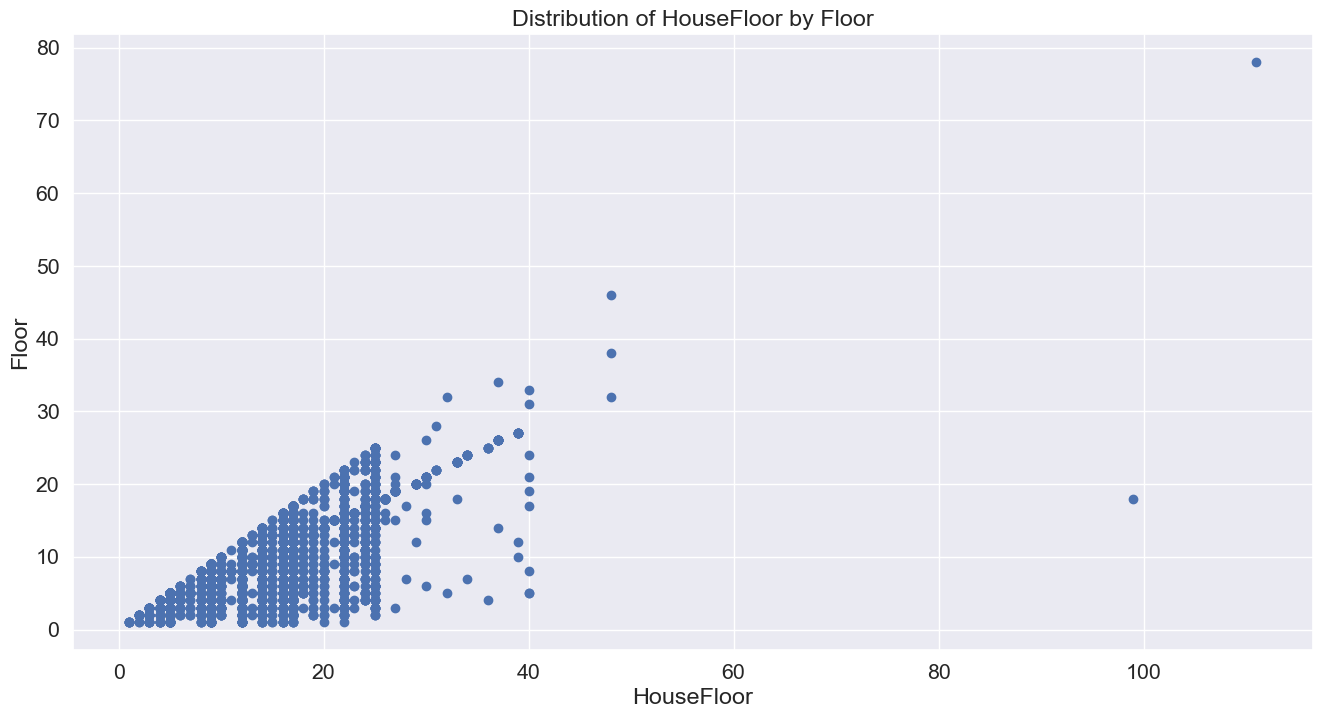

In [98]:
plt.figure(figsize=(16, 8))

plt.scatter(test_df['HouseFloor'], test_df['Floor'])

plt.xlabel('HouseFloor')
plt.ylabel('Floor')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

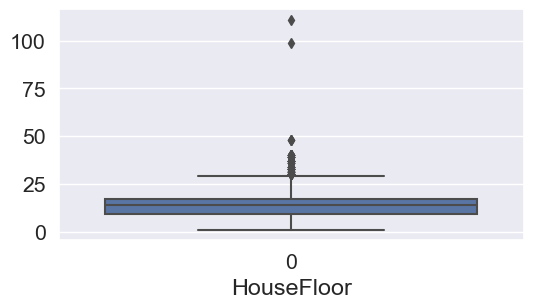

In [99]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['HouseFloor'], whis=1.5)

plt.xlabel('HouseFloor')
plt.show()

In [100]:
test_df.loc[(test_df['HouseFloor'] > 50)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
449,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
1483,15759,17,2.0,57.601870,37.744743,10.0,78,111.0,1989,0.000000,B,B,25,5027,4,46.0,1,1,B


In [101]:
test_df.loc[(test_df['HouseFloor'] ==99 ), 'HouseFloor'] = round(test_df.loc[(test_df['HouseFloor'] == 99), 'Floor']*test_q_house_floor_median)

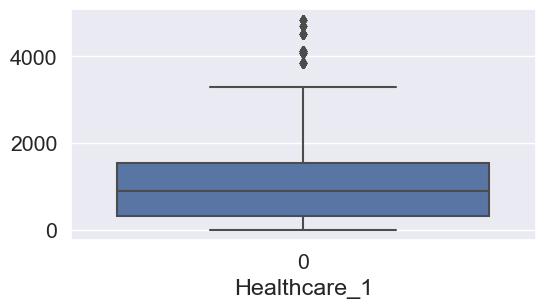

In [102]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['Healthcare_1'], whis=1.5)

plt.xlabel('Healthcare_1')
plt.show()

In [103]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [104]:
test_df['HouseYear'].unique()

array([1970, 2017, 1977, 1965, 2011, 2014, 1974, 1981, 2009, 2004, 2007,
       1990, 2015, 1979, 1972, 2020, 1964, 1997, 1980, 2016, 1988, 1968,
       1994, 2013, 1967, 1960, 2018, 1949, 2000, 2002, 1982, 1963, 1959,
       1989, 1962, 1985, 1966, 1958, 1999, 2008, 2005, 2001, 1995, 1978,
       1992, 1986, 2006, 2003, 1961, 1969, 2010, 1971, 1996, 1987, 1975,
       2019, 1973, 1998, 1957, 1993, 1976, 1956, 2012, 1983, 1984, 1932,
       1941, 1928, 1935, 1931, 1926, 1991, 1914, 1952, 1930, 1953, 1917,
       1938, 1933, 1948, 1929, 1943, 1927, 1955, 1934, 1908, 1954, 1918,
       1950, 1920, 1910, 1909, 1911, 1937, 1939, 1940, 1912], dtype=int64)

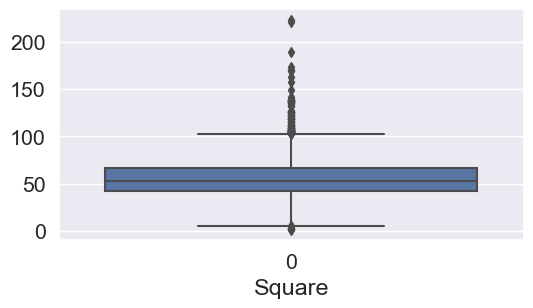

In [105]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

In [106]:
test_df.loc[(test_df['Square'] > 100)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
54,163,62,3.0,135.250828,NaN,1.0,1,3.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A
133,6918,23,3.0,105.535135,NaN,1.0,6,9.0,1977,0.014073,B,B,2,475,0,900.0,0,0,B
241,16053,17,4.0,168.729035,169.901701,0.0,4,12.0,2013,0.093443,B,B,23,4635,5,3300.0,2,4,B
245,11567,0,3.0,108.851325,53.427051,13.0,20,29.0,2012,0.006076,B,B,30,5285,0,645.0,6,6,B
258,796,27,3.0,102.110052,104.525733,10.0,13,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,13303,109,3.0,101.658967,51.827352,11.0,10,22.0,2006,0.136330,B,B,30,6141,10,262.0,3,6,B
4902,16256,24,3.0,101.483396,52.479780,13.0,6,7.0,2006,0.111627,B,B,50,12238,8,1970.0,2,3,B
4914,7460,9,3.0,111.956252,66.859845,15.0,8,14.0,1997,0.136244,B,B,11,2370,0,900.0,0,1,B
4963,52,1,3.0,108.652615,1.694469,1.0,10,17.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B


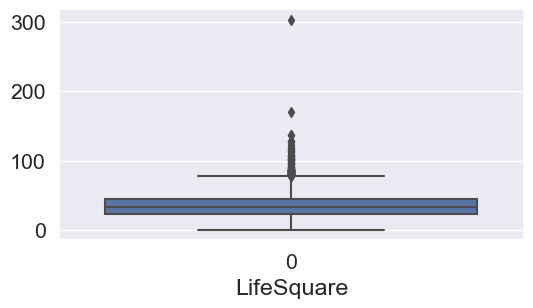

In [107]:
plt.figure(figsize=(6, 3))

sns.boxplot(test_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

In [108]:
test_df.loc[(test_df['LifeSquare'] > 200)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3798,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,900.0,0,0,B


In [109]:
test_df['LifeSquare']/test_df['Square']  # ищем коэффициент

0       0.518193
1       1.001747
2            NaN
3       0.682710
4            NaN
          ...   
4995    0.702679
4996    1.008787
4997    0.564620
4998    0.542932
4999    0.505706
Length: 5000, dtype: float64

In [110]:
test_q_square_median = (test_df['LifeSquare']/test_df['Square']).median()
test_q_square_median

0.6195914296191131

In [111]:
test_df['LifeSquare'] = test_df['LifeSquare']. fillna(test_df['Square']*test_q_square_median)

In [112]:
test_df.loc[test_df['LifeSquare']>200,'LifeSquare'] = test_df.loc[test_df['LifeSquare']>200, 'Square']*test_q_square_median #лечим выброс на ~ 7500

In [113]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,1,1,1,809,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,B,177734.553407,1,1,1,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,B,282078.720850,1,1,1,646,1,243966.403596
3,2352,1,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,1,1,1,646,1,147110.201250
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,1,1,1,88,0,201584.441255


In [114]:
test_df.loc[(test_df['LifeSquare'] > 75)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
22,15709,48,3.0,86.489935,86.165023,1.0,24,34.0,2015,0.041125,B,B,46,9515,5,900.0,1,10,B
25,14686,1,3.0,77.229885,79.958685,1.0,18,26.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
28,10869,23,3.0,78.001888,82.566322,1.0,21,25.0,2015,0.075779,B,B,6,1437,3,900.0,0,2,B
47,10478,6,3.0,80.986104,77.534811,1.0,10,14.0,2013,0.243205,B,B,5,1564,0,540.0,0,0,B
54,163,62,3.0,135.250828,83.800254,1.0,1,3.0,2018,0.072158,B,B,2,629,1,900.0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,16228,17,1.0,121.453559,87.521642,17.0,17,22.0,2013,0.000000,B,B,18,3374,5,620.0,1,2,B
4968,6330,53,3.0,81.685472,77.608386,1.0,3,9.0,2019,0.049637,B,B,34,7759,0,229.0,1,3,B
4979,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B
4983,9519,62,3.0,81.912997,75.872094,11.0,3,6.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A


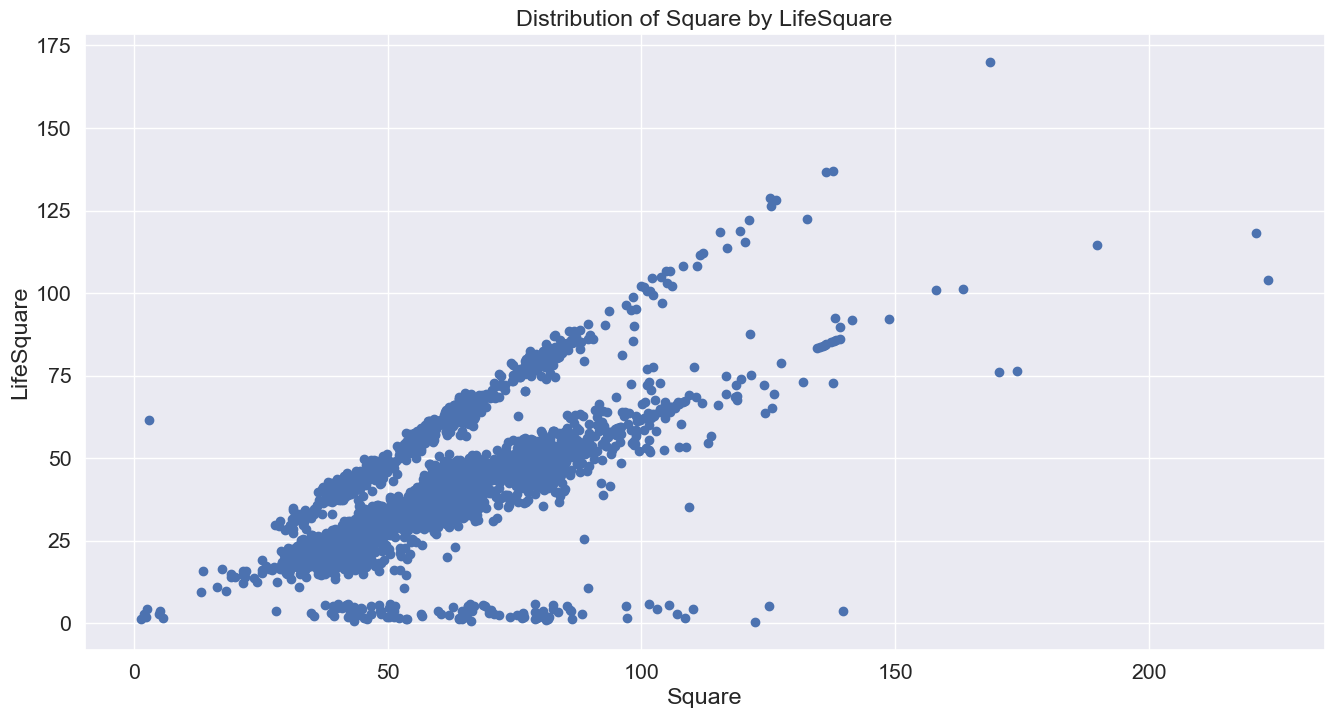

In [115]:
plt.figure(figsize=(16, 8))

plt.scatter(test_df['Square'], test_df['LifeSquare'])

plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Distribution of Square by LifeSquare')
plt.show()

In [116]:
test_df.loc[(test_df['LifeSquare'] < 11) & (test_df['Square'] > 0) ,'LifeSquare'] = test_df.loc[(test_df['LifeSquare'] < 11) & (test_df['Square'] > 0), 'Square']*test_q_square_median

In [117]:
test_df.loc[(test_df['LifeSquare'] > 50) & (test_df['Square'] < 10) ,'LifeSquare'] = test_df.loc[(test_df['LifeSquare'] > 50) & (test_df['Square'] < 10), 'Square']*test_q_square_median

In [118]:
test_df.loc[(test_df['LifeSquare'] > test_df['Square'])] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,900.0,0,0,A
25,14686,1,3.0,77.229885,79.958685,1.0,18,26.0,1977,0.007122,B,B,1,264,0,900.0,0,1,B
28,10869,23,3.0,78.001888,82.566322,1.0,21,25.0,2015,0.075779,B,B,6,1437,3,900.0,0,2,B
39,16384,1,2.0,52.773671,52.910722,10.0,6,17.0,2017,0.007122,B,B,1,264,0,900.0,0,1,B
48,15509,27,2.0,55.439861,57.527243,10.0,15,17.0,2016,0.011654,B,B,4,915,0,900.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,15984,23,3.0,104.786355,106.730272,1.0,14,25.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
4945,9888,45,2.0,60.501260,60.881119,10.0,24,24.0,2016,0.195781,B,B,23,5212,6,900.0,3,2,B
4970,13494,169,1.0,47.012027,47.372332,8.0,4,17.0,2019,0.178917,B,B,18,3594,4,192.0,1,5,B
4979,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


In [119]:
test_df.loc[(test_df['LifeSquare'] > test_df['Square']),'LifeSquare'] = test_df.loc[(test_df['LifeSquare'] > test_df['Square']), 'Square']*test_q_square_median

In [120]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A': 0, 'B': 1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A': 0, 'B': 1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A': 0, 'B': 1})

In [121]:
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

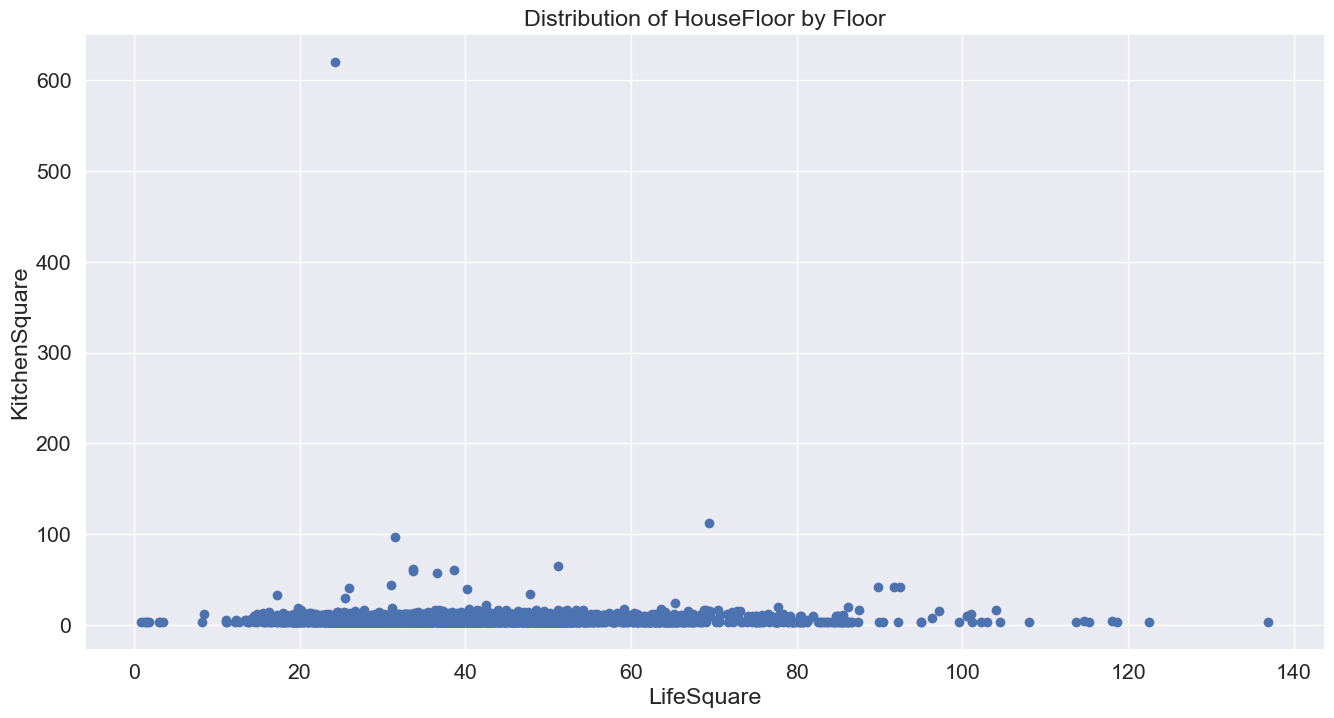

In [122]:
plt.figure(figsize=(16, 8))

plt.scatter(test_df['LifeSquare'], test_df['KitchenSquare'])

plt.xlabel('LifeSquare')
plt.ylabel('KitchenSquare')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

In [123]:
test_df.loc[(test_df['KitchenSquare'] > 500)] 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
3750,14594,11,2.0,42.795304,24.22377,620.0,11,14.0,1972,0.038693,...,28,6533,1,1015.0,2,5,B,1,1,1


In [124]:
test_df['KitchenSquare']/test_df['LifeSquare']

0       0.261860
1       0.379811
2       0.244279
3       0.177023
4       0.089936
          ...   
4995    0.164799
4996    0.172252
4997    0.263113
4998    0.429057
4999    0.382980
Length: 5000, dtype: float64

In [125]:
test_q_kitchen_square_median = (test_df['KitchenSquare']/test_df['LifeSquare']).median()
test_q_kitchen_square_median

0.18785073644281214

In [126]:
test_df.loc[test_df['KitchenSquare']>500,'KitchenSquare'] = test_df.loc[test_df['KitchenSquare']>500, 'LifeSquare']*test_q_kitchen_square_median

In [127]:
test_df.loc[(test_df['KitchenSquare'] > test_df['LifeSquare']),'KitchenSquare'] = test_df.loc[(test_df['KitchenSquare'] > test_df['LifeSquare']), 'LifeSquare']*test_q_kitchen_square_median

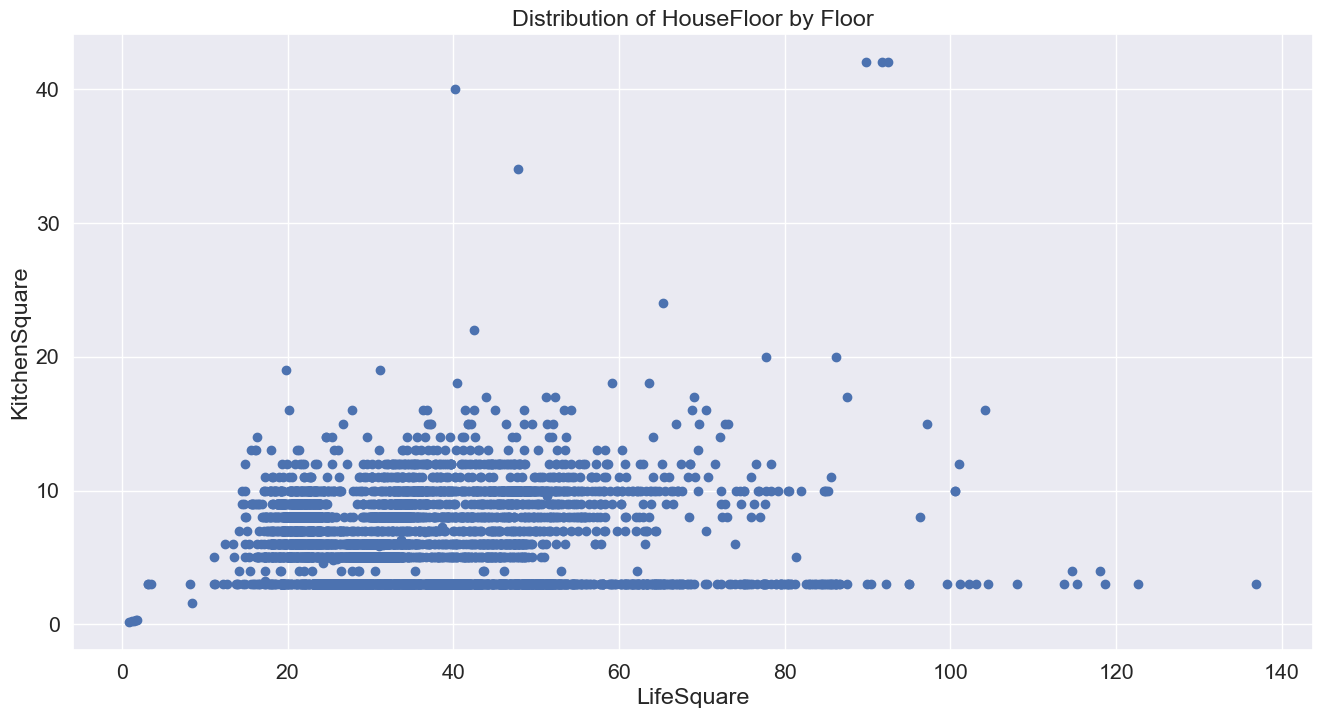

In [128]:
plt.figure(figsize=(16, 8))

plt.scatter(test_df['LifeSquare'], test_df['KitchenSquare'])

plt.xlabel('LifeSquare')
plt.ylabel('KitchenSquare')
plt.title('Distribution of HouseFloor by Floor')
plt.show()

In [129]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [130]:
test_df['Ecology_2_bin'].unique(), test_df['Ecology_3_bin'].unique(), test_df['Shops_2_bin'].unique()

(array([1, 0], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64))

In [131]:
test_df['Social_1'].unique(), test_df['Social_2'].unique(), test_df['Social_3'].unique()

(array([24,  2,  9, 35, 15, 33,  1, 39, 23, 25, 53,  6, 30, 49, 21, 34, 46,
         3, 16,  8, 22, 36, 11, 43,  0,  5,  4, 32, 17, 74, 31, 52, 27, 47,
        66, 42, 29, 37, 18, 28, 19, 12, 41, 38, 10, 50,  7, 26, 14, 20, 13],
       dtype=int64),
 array([ 4378,   629,  1892,   475,  7715,  2787,  7425,   264,  7614,
         5735,  5648, 14892,  1437,  5469,  6207, 11395,  4472,  7759,
         9515,   662,  4048,  1497,  6398,  5992,  2398,  7227, 13670,
         7065,   168,  1564,   915,  6748,  5889,  3097,  3379, 19083,
         4346,  5487,  6119, 10311,  3975,  5569,  5011,  4724,  5148,
         1227,  8004, 10573,  5027,  9292,  6566,  1986,  7687,  4625,
         8429, 11217,  3594,  5562,   469,  3893,  4798,  6746,  3856,
         2270,  6558, 11319,  5261,  8667,  3478,  2748,  6714,  4231,
        10055,  7010,  5731,  6149,  6533,  5288,  1768,  4789,  3293,
         1952,  5776,  7960,  4788,  4635,  2277, 12238,  2370,  6564,
         1660,  3889, 10309,  5285,  506

In [132]:
test_district_size = test_df['DistrictId'].value_counts().reset_index()\
.rename(columns={'index':'DistrictId', 'DistrictId': 'DistrictSize'})
test_district_size.head()

,DistrictId,DistrictSize
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [133]:
test_df = test_df.merge(test_district_size, on = 'DistrictId', how = 'left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,4378,0,1036.0,1,1,B,1,1,1,46
1,5925,62,1.0,42.493907,26.328861,10.0,7,17.0,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,122
2,960,27,2.0,59.463678,36.843185,9.0,19,19.0,1977,0.211401,...,1892,0,900.0,0,1,B,1,1,1,391
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,475,0,900.0,0,0,B,1,1,1,264
4,746,74,1.0,53.837056,33.356978,3.0,8,17.0,1977,0.309479,...,7715,4,990.0,0,6,B,1,1,1,61


In [134]:
#train_df.loc[train_df['Square']>100, 'Square']=train_df['Square'].median()
#train_df.loc[train_df['Square']==0, 'Square']=train_df['Square'].median()

In [135]:
(test_df['DistrictSize'] > 100).value_counts()

False    3375
True     1625
Name: DistrictSize, dtype: int64

In [136]:
test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

In [137]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,0,1036.0,1,1,B,1,1,1,46,0
1,5925,62,1.0,42.493907,26.328861,10.0,7,17.0,2017,0.072158,...,1,900.0,0,0,A,1,1,0,122,1
2,960,27,2.0,59.463678,36.843185,9.0,19,19.0,1977,0.211401,...,0,900.0,0,1,B,1,1,1,391,1
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,0,900.0,0,0,B,1,1,1,264,1
4,746,74,1.0,53.837056,33.356978,3.0,8,17.0,1977,0.309479,...,4,990.0,0,6,B,1,1,1,61,0


In [138]:
test_df = test_df.merge(med_price_by_district, on = ['DistrictId', 'Rooms'], how = 'left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1036.0,1,1,B,1,1,1,46,0,171145.169069
1,5925,62,1.0,42.493907,26.328861,10.0,7,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,122,1,129986.318474
2,960,27,2.0,59.463678,36.843185,9.0,19,19.0,1977,0.211401,...,900.0,0,1,B,1,1,1,391,1,165993.292450
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,900.0,0,0,B,1,1,1,264,1,171040.564707
4,746,74,1.0,53.837056,33.356978,3.0,8,17.0,1977,0.309479,...,990.0,0,6,B,1,1,1,61,0,163088.780260


In [139]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,11809,27,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,1,1,1,809,1,213530.788443
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,B,177734.553407,1,1,1,78,0,146032.829834
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,B,282078.720850,1,1,1,646,1,243966.403596
3,2352,1,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,1,1,1,646,1,147110.201250
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,1,1,1,88,0,201584.441255


In [140]:
test_df.isna().sum()

Id                     0
DistrictId             0
Rooms                  0
Square                 0
LifeSquare             0
KitchenSquare          0
Floor                  0
HouseFloor             0
HouseYear              0
Ecology_1              0
Ecology_2              0
Ecology_3              0
Social_1               0
Social_2               0
Social_3               0
Healthcare_1           0
Helthcare_2            0
Shops_1                0
Shops_2                0
Ecology_2_bin          0
Ecology_3_bin          0
Shops_2_bin            0
DistrictSize           0
IsDistrictLarge        0
MedPriceByDistrict    71
dtype: int64

In [141]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   int64  
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        5000 non-null   float64
 16  Helthc

In [142]:
test_df.loc[(test_df['MedPriceByDistrict'] ).isnull(), 'MedPriceByDistrict'] = test_df['MedPriceByDistrict'].median()

In [143]:
train_df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
DistrictSize          0
IsDistrictLarge       0
MedPriceByDistrict    0
dtype: int64

In [144]:
train_df[feature_names + new_features_names]

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,IsDistrictLarge,MedPriceByDistrict
0,3.0,52.513850,32.560386,10.0,4,10.0,2014,0.075424,1,1,11,3097,0,900.0,0,0,1,1,213530.788443
1,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,1,1,30,6207,1,1183.0,1,0,1,0,146032.829834
2,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,1,1,33,5261,0,240.0,3,1,1,1,243966.403596
3,1.0,40.409907,25.055527,3.0,10,22.0,1977,0.007122,1,1,1,264,0,900.0,0,1,1,1,147110.201250
4,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,1,1,33,8667,2,900.0,0,6,1,0,201584.441255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,1,1,52,10311,6,900.0,1,9,1,1,232514.855623
9739,2.0,64.307684,37.038420,9.0,13,13.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,1,165993.292450
9740,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,1,1,20,4386,14,900.0,1,5,1,0,165953.912580
9741,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,1,1,47,8004,3,125.0,3,5,1,1,153688.684915


In [145]:
test_df[Id + feature_names + new_features_names]

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,IsDistrictLarge,MedPriceByDistrict
0,4567,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,1,1,24,4378,0,1036.0,1,1,1,0,171145.169069
1,5925,1.0,42.493907,26.328861,10.0,7,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,1,129986.318474
2,960,2.0,59.463678,36.843185,9.0,19,19.0,1977,0.211401,1,1,9,1892,0,900.0,0,1,1,1,165993.292450
3,3848,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,1,1,2,475,0,900.0,0,0,1,1,171040.564707
4,746,1.0,53.837056,33.356978,3.0,8,17.0,1977,0.309479,1,1,35,7715,4,990.0,0,6,1,0,163088.780260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,2.0,43.177521,30.339945,5.0,6,9.0,1962,0.069660,1,1,31,6119,4,900.0,1,2,1,0,185083.534141
4996,16138,3.0,93.698122,58.054553,10.0,21,27.0,2018,0.060753,1,1,15,2787,2,520.0,0,7,1,0,425037.641820
4997,3912,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,1,1,28,6533,1,1015.0,2,5,1,0,151926.384470
4998,5722,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,1,1,33,7976,5,900.0,0,11,1,0,168501.260938


In [146]:
y_testset = model.predict(test_df[feature_names + new_features_names])
y_testset

array([156236.70384013, 123853.80380736, 141730.33070459, ...,
       143721.48666345, 181500.58569408, 288290.54097788])

In [147]:
SUBMIT_DATASET_PATH = 'sample_submission.csv'

In [148]:
submit_df = pd.read_csv(SUBMIT_DATASET_PATH, sep = ',')
submit_df.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [149]:
submit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5000 non-null   int64  
 1   Price   5000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [150]:
submit_df['Price'] = y_testset
submit_df.head()

,Id,Price
0,4567,156236.703840
1,5925,123853.803807
2,960,141730.330705
3,3848,165526.604992
4,746,176633.496947


In [151]:
submit_df.to_csv('submission_set.csv', index=False)